# Oral microbiome dataset  

### Description 

The collection of buccal swabs for human genetic sequencing presents an advantageous opportunity to simultaneously explore the oral microbiome using the non-human DNA sequences found. This metagenomic analysis provides insight into the diverse microbial community within the buccal mucosa. The obtained data not only enriches our genetic understanding but also broadens our knowledge on the microorganisms residing in the oral cavity, their interactions, and potential implications for oral and systemic health. This dual analysis underscores the utility of buccal swabs as a resourceful means for both genetic and microbial investigations.


### Introduction

The primary intent behind collecting buccal swabs was to explore human genetics. Concurrently, it yielded metagenomic data, unveiling the microbial community within the oral cavity.

This data illuminates the diversity and interactions of microorganisms, specifically in the buccal mucosa. Delving into the oral microbiome presents an opportunity to understand its linkage to health conditions. For instance, an imbalanced oral microbiome can lead to periodontal disease, associated with an increased risk of cardiovascular diseases. Moreover, alterations in the oral microbiome have been observed in oral cancers, hinting at its potential role in their onset and progression​ [The oral microbiome: diversity, biogeography and human health](https://www.nature.com/articles/s41579-023-00963-6)​. 

Through this data, the exploration into possible connections between oral microbial composition and various health conditions is facilitated, marking a step towards understanding the broader health implications.

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
This dataset is a derivative of the human genome dataset (that has been collected via buccal swabs) - ergo the measurement protocol can be found at the Human genetics dataset.


### Data availability 
<!-- for the example notebooks -->
The information is stored in multiple parquet files:

- `oral_microbiome.parquet`: Sequencing and QC statistics.
- `metaphlan_*`: 8 tables with MetaPhlAn 4 vJan21 relative abundances, separated by taxonomic levels.
- `humann_aggregated_*`: arrow files of either gene level abundances or pathway level abundances+coverage from HumanN 3.6 given MetaPhlAn 4 vJan21 outputs

```{mermaid}
graph LR;
    A(Human Aligned<br>BAM) --> |Filter and convert| B(Non Human Reads<br>FASTQ)
    B --> |Trimmomatic| C(Clean FASTQ File)
    C --> |MetaPhlAn| D(MetaPhlAn 4 /<br>vJan21 Abundances<br>Tabular)
    C --> |HumanN| E(HumanN 3.6 genes abundance)
    C --> |HumanN| F(HumanN 3.6 Pathways abundance)
    C --> |HumanN| G(HumanN 3.6 Pathways coverage)
    C --> |FastQC| H(Reads QC report - after)
    B ---> |FastQC| I(Reads QC report - before)
```

### Relevant links

* Pheno Knowledgebase: https://knowledgebase.pheno.ai/datasets/070-oral_microbiome.html
* Pheno Data Browser: https://pheno-demo-app.vercel.app/folder/70

In [1]:
#| echo: false
import pandas as pd
pd.set_option("display.max_rows", 500)

In [2]:
from pheno_utils import PhenoLoader

In [3]:
pl = PhenoLoader('oral_microbiome')
pl

PhenoLoader for oral_microbiome with
39 fields
2 tables: ['oral_microbiome', 'age_sex']

# Data dictionary

In [4]:
pl.dict

folder_id  \
tabular_field_name                                              
collection_date                                           NaN   
metaphlan_abundance_kingdom_parquet                       NaN   
metaphlan_abundance_phylum_parquet                        NaN   
metaphlan_abundance_class_parquet                         NaN   
metaphlan_abundance_order_parquet                         NaN   
metaphlan_abundance_family_parquet                        NaN   
metaphlan_abundance_genus_parquet                         NaN   
metaphlan_abundance_species_parquet                       NaN   
metaphlan_abundance_strain_parquet                        NaN   
raw_fastq                                                 NaN   
trimmed_fastq                                             NaN   
fastqc_raw_html                                           NaN   
fastqc_raw_zip                                            NaN   
fastqc_trimmed_html                                       NaN   
fastqc_trimmed_zip                                        NaN   
metaphlan4_results_tsv                                    NaN   
raw_read_count                                            NaN   
non_human_read_count                                      NaN   
trimmed_non_human_read_count                              NaN   
metaphlan4_aligned_read_count                             NaN   
gene_aligned_read_count                                   NaN   
humann_gene_families_tsv                                  NaN   
humann_gene_familites_gene_level_parquet                  NaN   
humann_gene_familites_microbe_level_parquet               NaN   
humann_pathway_abundance_tsv                              NaN   
humann_pathway_abundance_pathway_level_parquet            NaN   
humann_pathway_abundance_microbe_level_parquet            NaN   
humann_pathway_coverage_tsv                               NaN   
humann_pathway_coverage_pathway_level_parquet             NaN   
humann_pathway_coverage_microbe_level_parquet             NaN   
humann_intermediate_files_tar                             NaN   
humann_aggregated_gene_familites_gene_level_arrow         NaN   
humann_aggregated_gene_familites_microbiome_lev...        NaN   
humann_aggregated_pathway_abundance_pathway_lev...        NaN   
humann_aggregated_pathway_abundance_microbiome_...        NaN   
humann_aggregated_pathway_coverage_pathway_leve...        NaN   
humann_aggregated_pathway_coverage_microbiome_l...        NaN   

                                                             feature_set  \
tabular_field_name                                                         
collection_date                                          oral_microbiome   
metaphlan_abundance_kingdom_parquet                 metaphlan_aggregated   
metaphlan_abundance_phylum_parquet                  metaphlan_aggregated   
metaphlan_abundance_class_parquet                   metaphlan_aggregated   
metaphlan_abundance_order_parquet                   metaphlan_aggregated   
metaphlan_abundance_family_parquet                  metaphlan_aggregated   
metaphlan_abundance_genus_parquet                   metaphlan_aggregated   
metaphlan_abundance_species_parquet                 metaphlan_aggregated   
metaphlan_abundance_strain_parquet                  metaphlan_aggregated   
raw_fastq                                                      raw_fastq   
trimmed_fastq                                              trimmed_fastq   
fastqc_raw_html                                                   fastqc   
fastqc_raw_zip                                                    fastqc   
fastqc_trimmed_html                                               fastqc   
fastqc_trimmed_zip                                                fastqc   
metaphlan4_results_tsv                                         metaphlan   
raw_read_count                                           oral_microbiome   
non_human_read_count                                     oral_microbiome

# Plot histogram and ecdf for raw_read_count at baseline visit


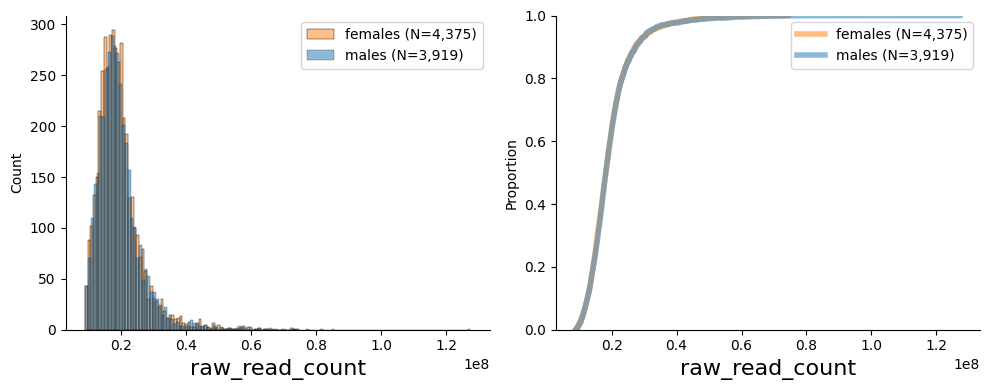

count             mean             std        min  \
raw_read_count  8294.0  19529470.245479  7338498.393217  8805038.0   

                       25%         50%         75%          max  
raw_read_count  15039265.5  18221025.5  21923790.0  127497332.0

In [5]:
from pheno_utils.basic_plots import hist_ecdf_plots

col = "raw_read_count"
df = pl[[col] + ["age", "sex", "collection_date"]].loc[:,:,"00_00_visit",0,:]

# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col,"sex", "age"]), col, gender_col="sex")

# stats
display(df[col].describe().to_frame().T)